# Graficación con **Ggplot2** en R

### Referencias
R Graph Gallery

https://es.r4ds.hadley.nz/comunicar-con-gr%C3%A1ficos.html

data to viz

https://rpubs.com/paraneda

https://frahik.github.io/DiplomadoR/index.html

https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html

In [1]:
# Primero cargaremos las librerias principales:

library(tidyverse)
library(plotly)
library(data.table)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yd

### ggplot2 crea los gráficos en base a una serie de capas tipo "geom_" para determinar el tipo de gráfico a crear, y unos elementos de estética que definen su aspecto particular. Tipos:

geom_bin, geom_boxplot, geom_density, geom_error, geom_hex, geom_hist, geom_hline, geom_jitter, geom_label, geom_line, geom_point, geom_polygon, geom_rect, geom_ribbon, geom_rug, geom_segment, geom_smooth, geom_text, geom_tile, geom_violin

# Elementos

* Siempre empieza llamando a la función ggplot().

* Luego se especifica el objeto de datos. Tiene que ser un marco de datos (dataframe). Y necesita una variable numérica y otra categórica.

* Luego viene la estética, establecida en la función "aes()": establecer la variable categórica para el eje X, usar la numérica para el eje Y.

* Finalmente llamar a "geom_()". Hay que especificar stat=“identity” para este tipo de conjunto de datos.

# Gramática
Data: el conjunto de datos

Layers: capa de gráfico dada por la función geom_ que especifica el tipo de gráfico a crear.

Scales:

Coordinates

Faceting:

Themes:

# Componentes principales:
Data: datos utilizados para la visualización.

Aesthetics: mapeo de datos en los ejes.

Layers: capa de gráfico dada por la función geom_ que especifica el tipo de gráfico a crear.

# Datos
Datos de ejemplo con el conjunto de datos **diamonds** contenido en tidyverse.

In [2]:
# mostrar la estructura del dataset
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


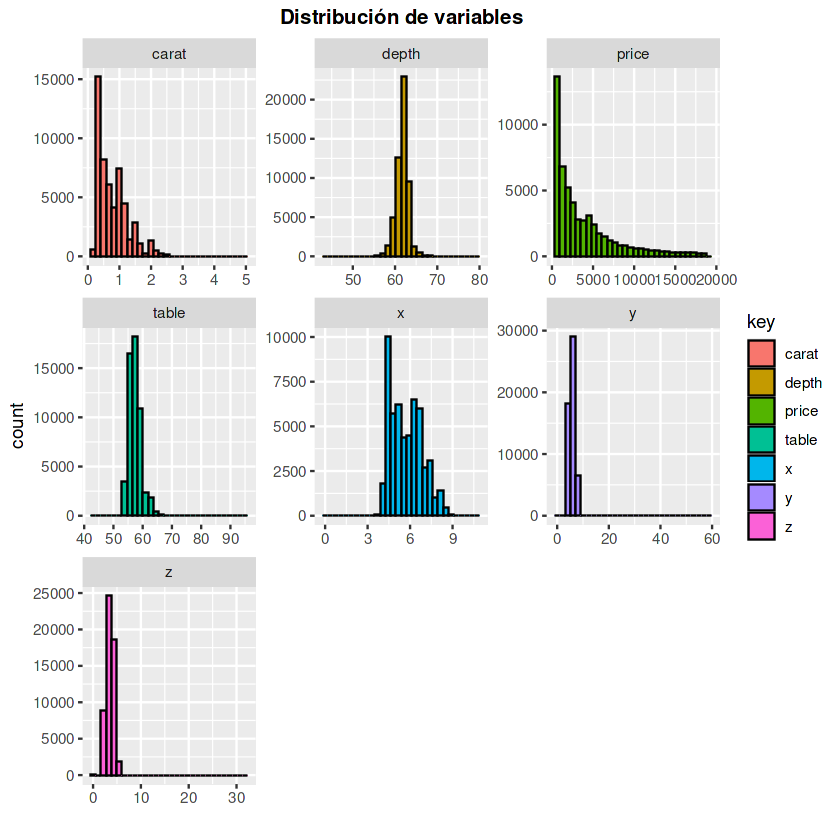

In [3]:
diamonds %>%
  keep(is.numeric) %>%
  gather() %>%
  ggplot() +
  geom_histogram(mapping = aes(x=value,fill=key), color="black") +
  theme(plot.title = element_text(size=12, # tamaño
                              hjust = 0.5, # centrado
                              face="bold", # estilo
                              color = "black") # color
      ) +
  facet_wrap(~ key, scales = "free") +
  xlab("") +
  ggtitle("Distribución de variables")

# complete.cases()

In [4]:
# complete.cases(diamonds)
# TRUE indica una fila completa;
# FALSE indica una fila con al menos una columna incompleta:

p <- sum(complete.cases(diamonds))
p

[1] 53940

# Sacamos columnas

In [5]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [6]:
# sacamos columnas
nuevo <- select(diamonds, -c(clarity, table, z))
str(nuevo)

tibble [53,940 × 7] (S3: tbl_df/tbl/data.frame)
 $ carat: num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut  : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color: Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ depth: num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ price: int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x    : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y    : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...


# Gráficos

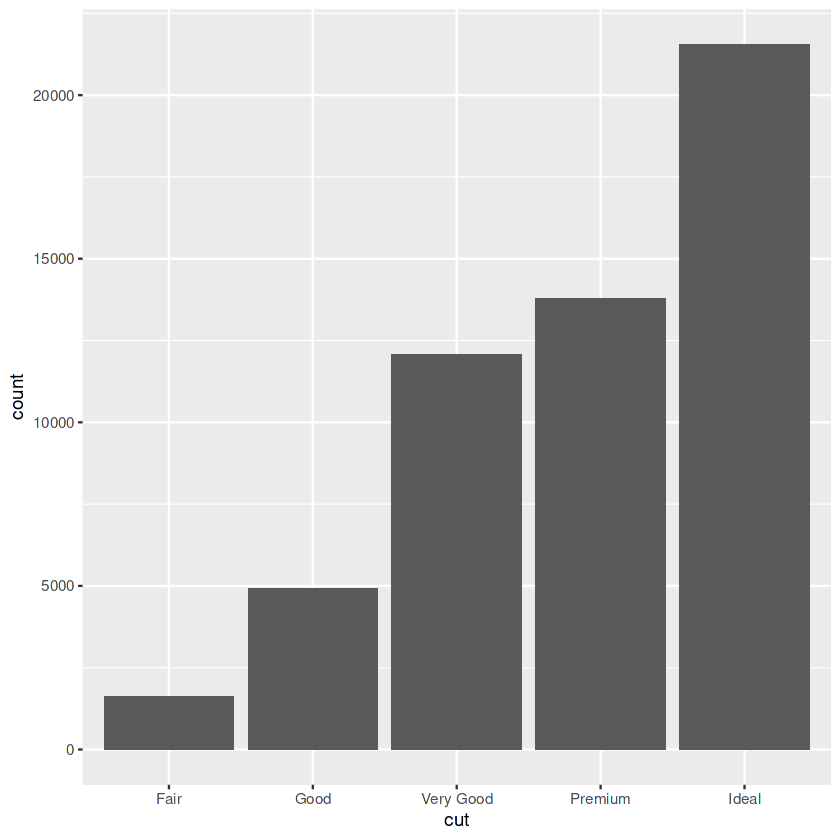

In [7]:
# El gráfico más simple.

ggplot(diamonds, aes(x = cut)) + geom_bar()

# Incorporación de etiquetas.

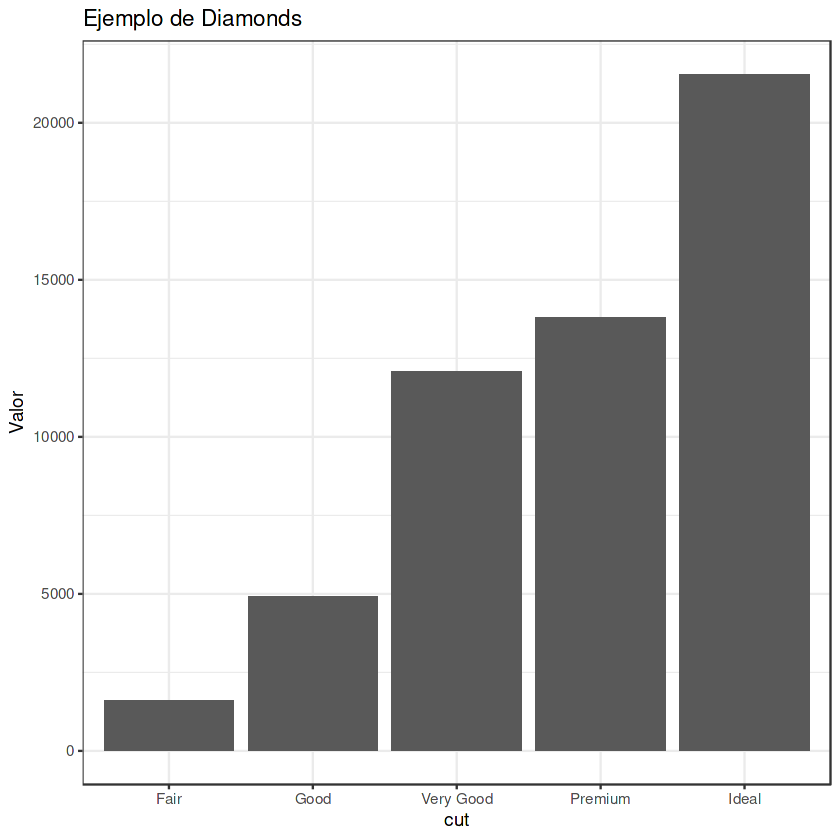

In [8]:
ggplot(diamonds, aes(x = cut)) + 
  theme_bw() + # pone un marco al rededor del gráfico
  geom_bar() +
  labs(y = "Valor", title = "Ejemplo de Diamonds")

# Agrupada.

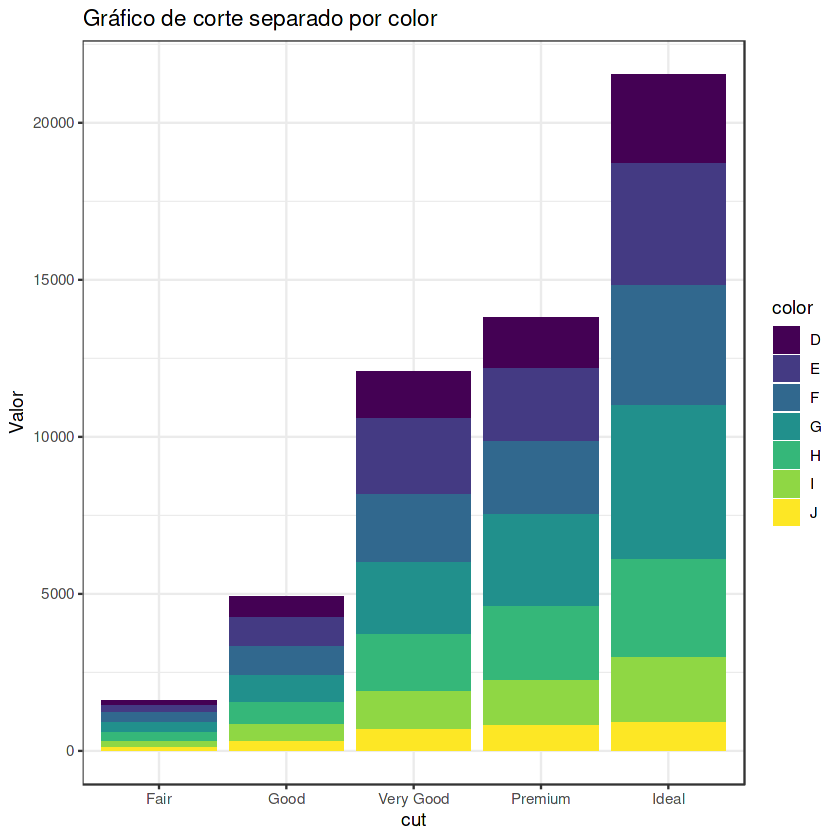

In [9]:
ggplot(diamonds, aes(x = cut, fill = color)) + 
  theme_bw() +
  geom_bar() +
  labs(y = "Valor", title = "Gráfico de corte separado por color")

# Agregado por grupos (columnas)

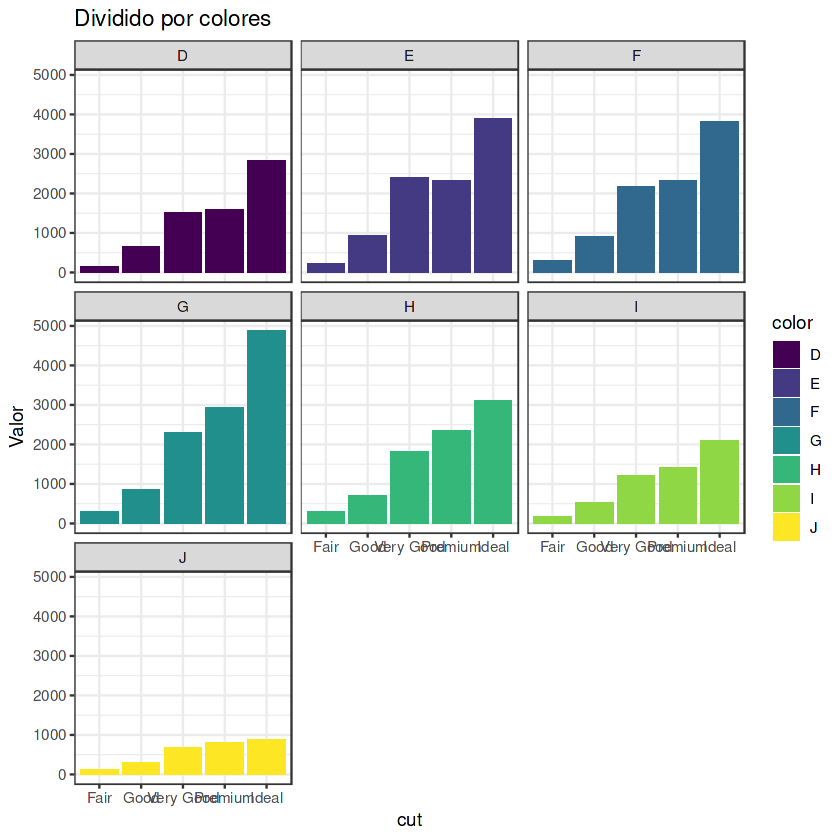

In [10]:
ggplot(diamonds, aes(x = cut, fill = color)) + 
  theme_bw() +
  facet_wrap(~ color) +
  geom_bar() +
  labs(y = "Valor", title = "Dividido por colores")

# Barplot
Un gráfico de barras se utiliza para mostrar la relación entre una variable numérica y una categórica.

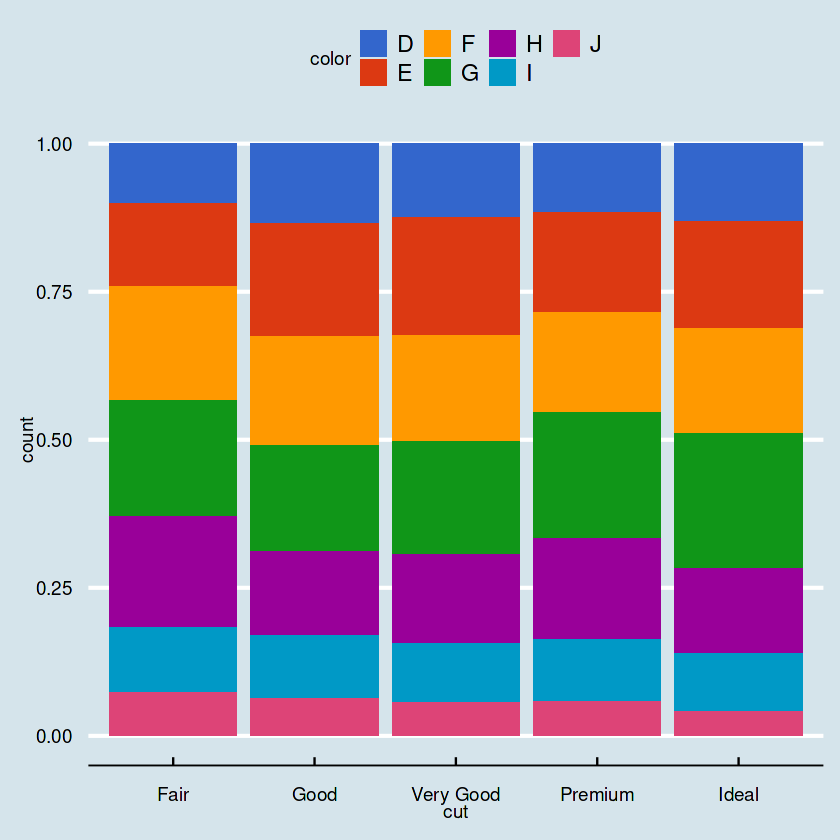

In [11]:
library(ggthemes)
# gráfico de barra
ggplot(diamonds, aes(x = cut, fill = color)) + 
  geom_bar(position = "fill") + 
  ggthemes::theme_economist() + 
  scale_color_gdocs() + 
  ggthemes::scale_fill_gdocs()

# Boxplot
Un boxplot muestra la distribución de datos de una variable continua.

Distribución de Colores:

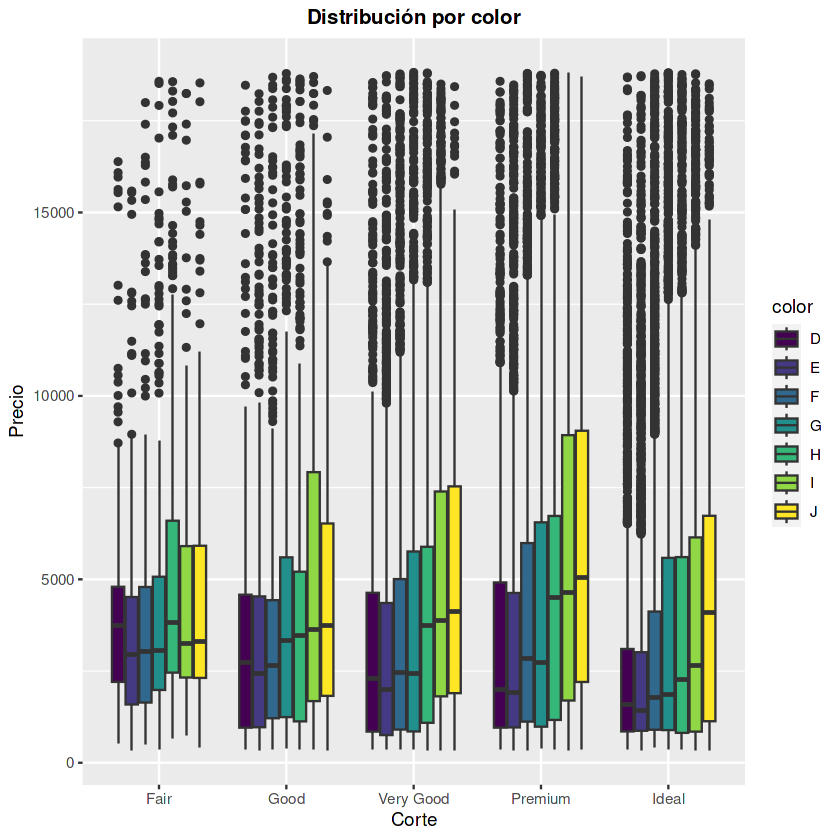

In [12]:
ggplot(diamonds, aes(x=cut, y=price, fill=color)) + 
  geom_boxplot() +
  theme(
    legend.position="right", # posición del cuadro de leyenda
    # "none" lo oculta
    plot.title = element_text(size=12, # tamaño
                              hjust = 0.5, # centrado
                              face="bold", # estilo
                              color = "black") # color
    ) +
  xlab("Corte") +
  ylab("Precio") +
  ggtitle("Distribución por color")

# Violin
Permite visualizar la distribución de variables numéricas para uno o más grupos. Sobre todo para grandes set de datos. Compara la densidad entre grupos.

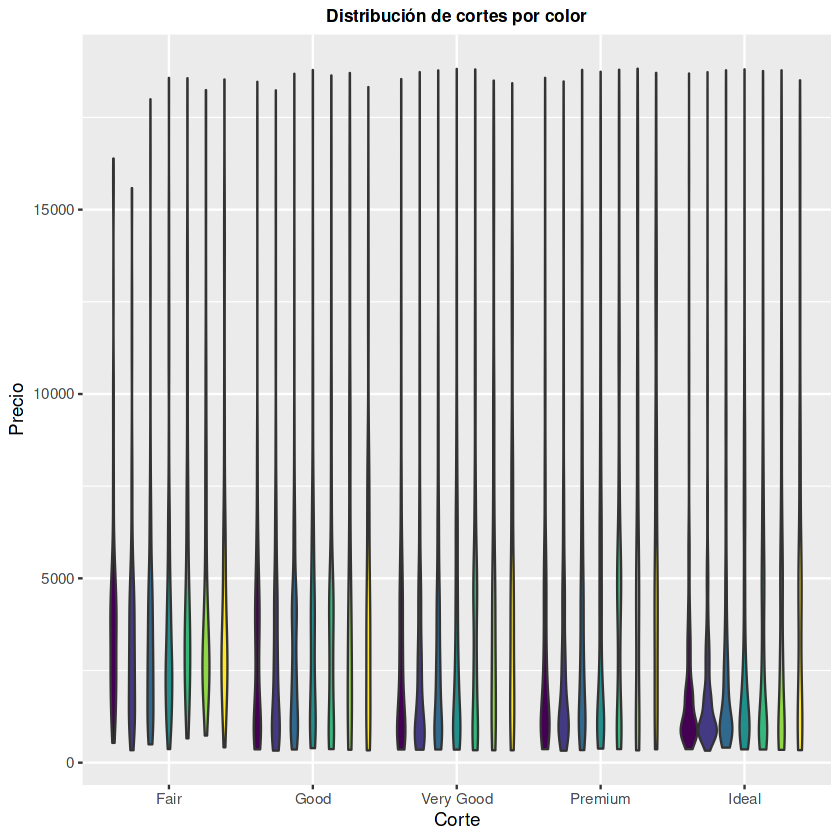

In [13]:
g2 <- diamonds %>%
  ggplot(aes(x=cut, y=price, fill=color)) + 
    geom_violin() +
    theme(
      legend.position="none",
      plot.title = element_text(size=10, # tamaño
                                hjust = 0.5, # centrado
                                face="bold", # estilo
                                color = "black")
  ) +
  labs( x="Corte", y="Precio", 
        title="Distribución de cortes por color")

g2

# Agregamos boxplot:

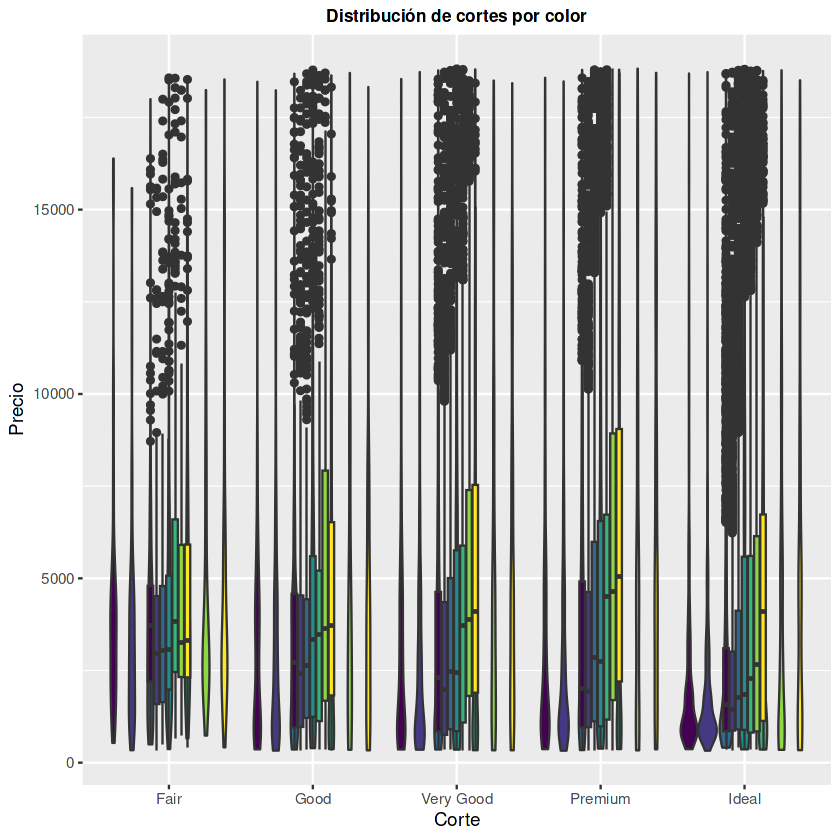

In [14]:
g2 + geom_boxplot(width = 0.3)

# Histograma
Un histograma es una representación gráfica de la distribución de una variable numérica. Sólo toma como entrada variables numéricas. La variable se divide en varios intervalos, y el número de observaciones por intervalo se representa mediante la altura de la barra.

Se usa para analizar una o pocas variables, siempre numéricas.

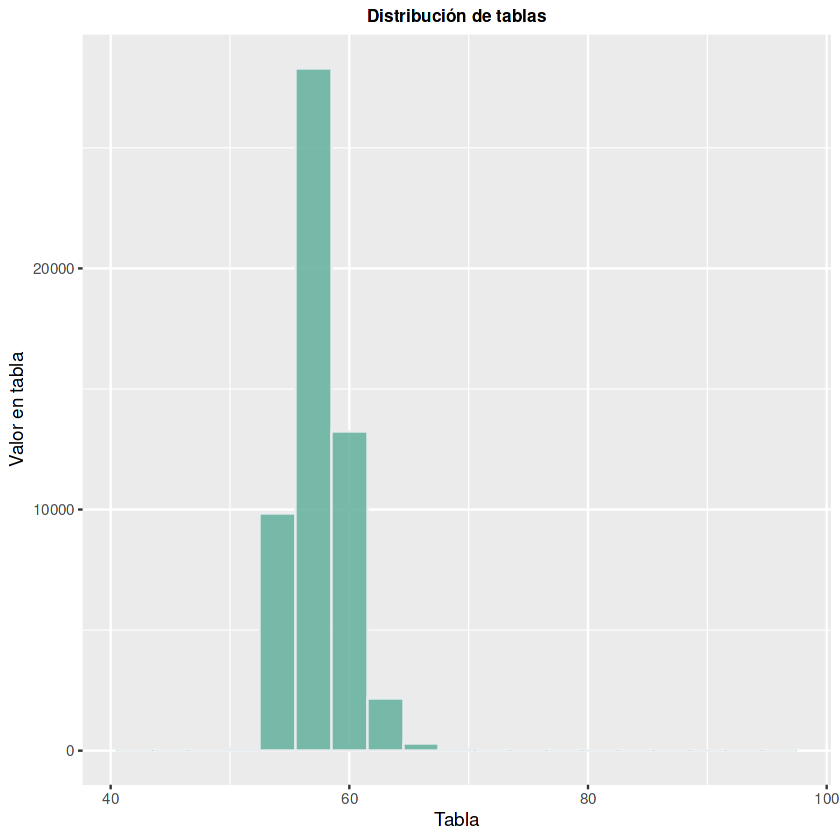

In [15]:
g3 <- diamonds %>%
  ggplot(aes(x=table)) +
  geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
  theme(
    plot.title = element_text(size=10, # tamaño
                                hjust = 0.5, # centrado
                                face="bold", # estilo
                                color = "black")
  ) +
  labs(x = "Tabla", y = "Valor en tabla", title = "Distribución de tablas")

g3

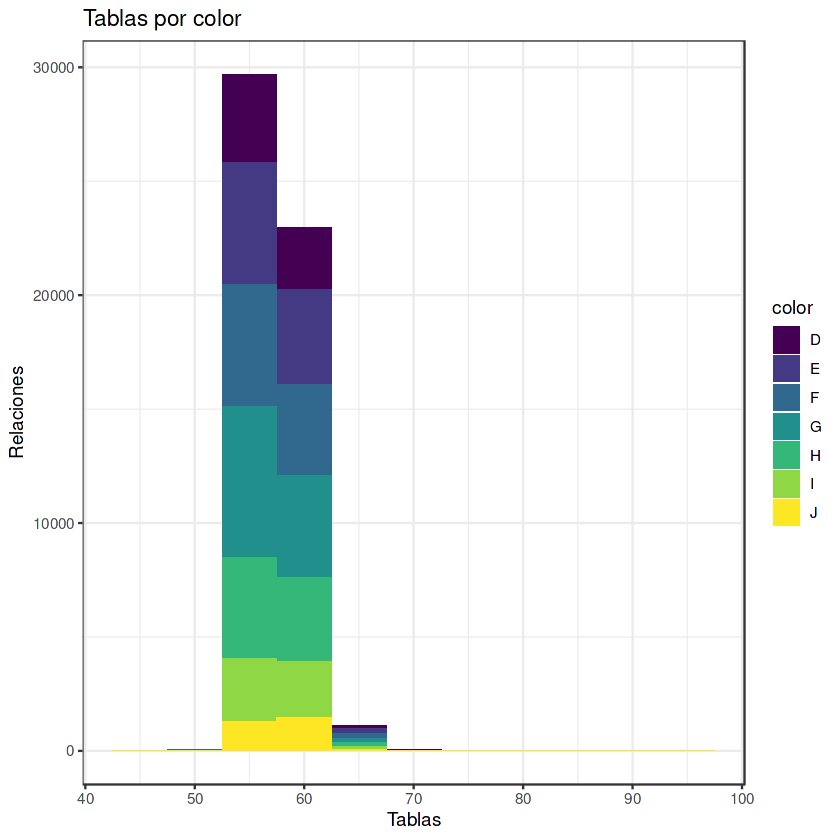

In [16]:
g5 <- diamonds %>%
  ggplot( aes(x = table, fill = color)) +
    theme_bw() +
  geom_histogram(binwidth = 5) +
  labs(y = "Relaciones", x ="Tablas", title = "Tablas por color")

g5

# Una variable numérica por grupo:

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


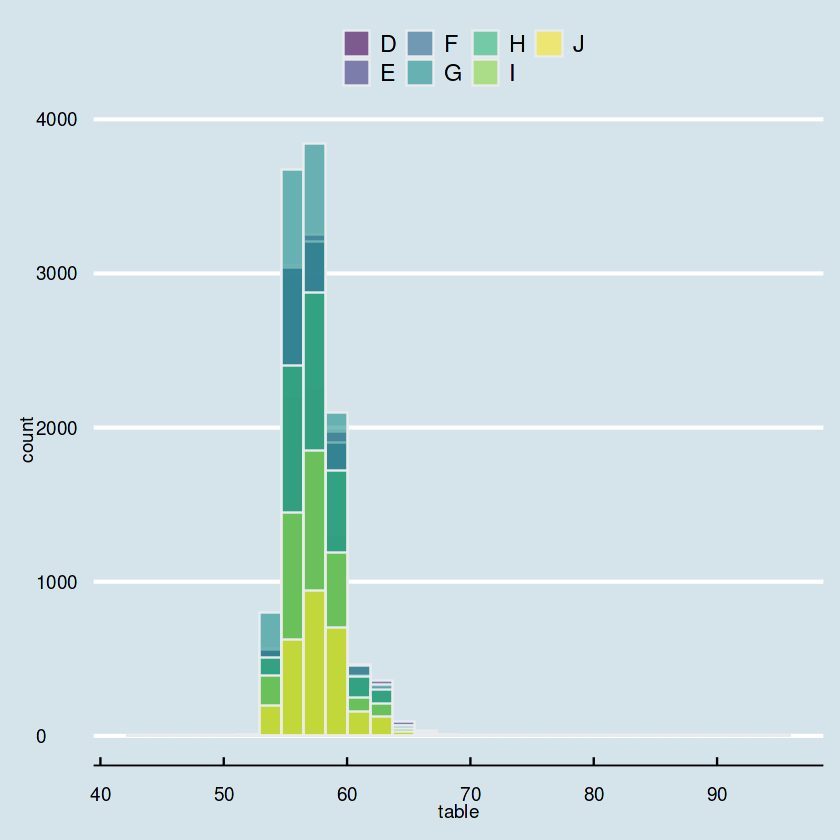

In [17]:
library(hrbrthemes)
g6 <- diamonds %>%
    ggplot( aes(x=table, fill=color, color=color)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity') +
   # scale_fill_manual(values=c("#69b3a2", "#404080")) +
    ggthemes::theme_economist() +
    labs(fill="")
g6

# Densidad

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


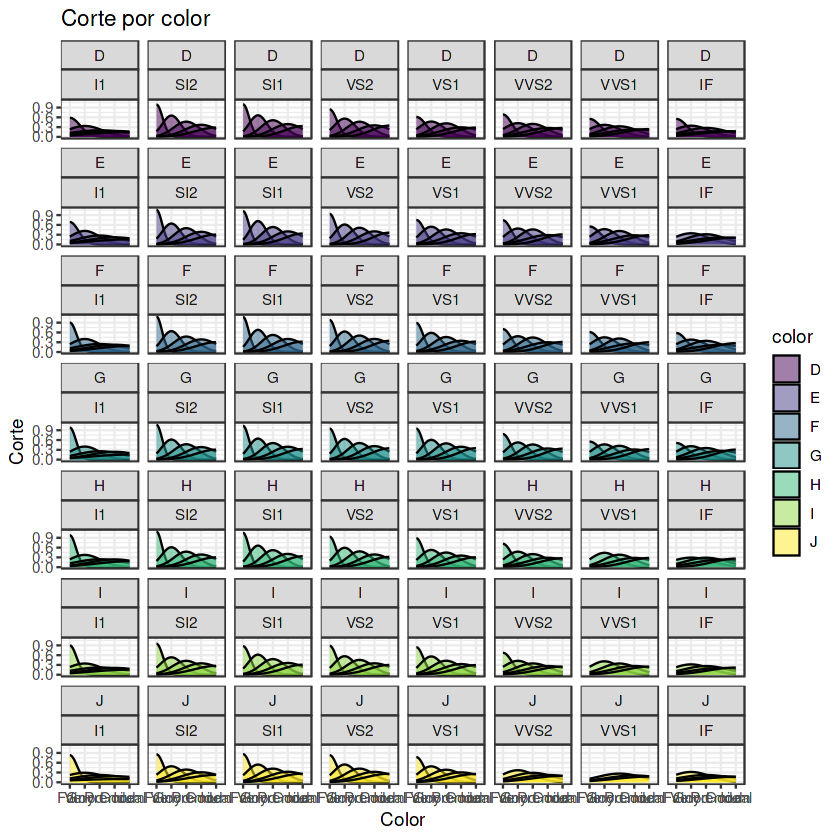

In [18]:
ggplot(diamonds, aes(x = cut, fill = color)) +
  theme_bw() +
  facet_wrap(color ~ clarity) +
  geom_density(alpha = 0.5) +
  labs(y = "Corte", x = "Color",
       title = "Corte por color")

# Dispersión

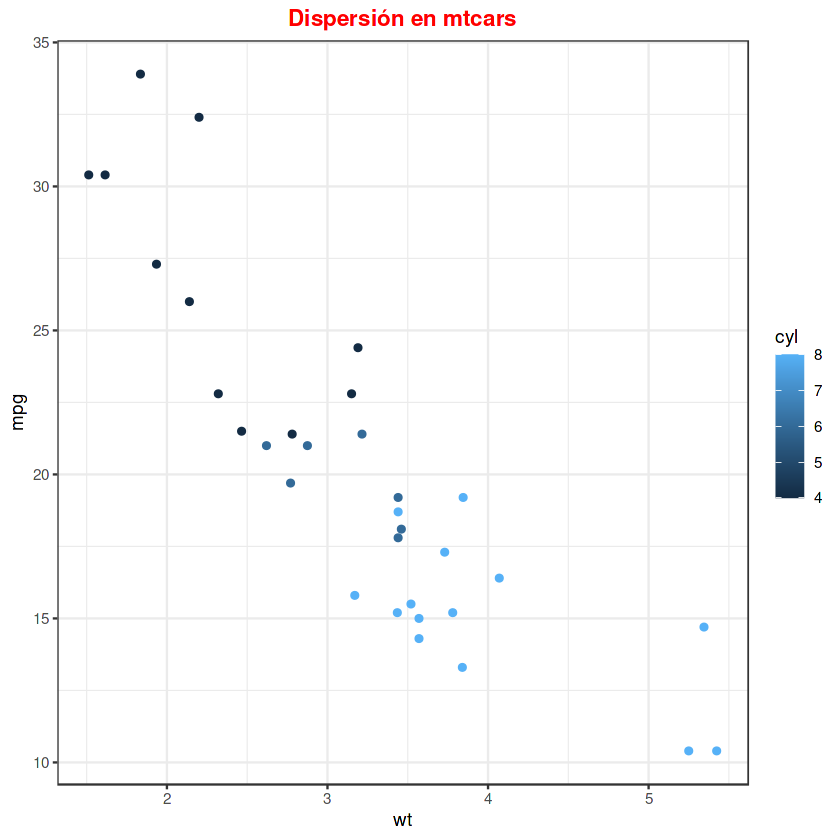

In [19]:
# Utilizamos los datos mtcars cargados en R por Tidyverse
data(mtcars)
# grafico simple
ggplot(mtcars, aes(x=wt, y=mpg, colour=cyl)) +
    geom_point() +
    theme_bw() +
    ggtitle("Dispersión en mtcars") +
    theme(plot.title = element_text(hjust=0.5,face="bold", color = "red"))

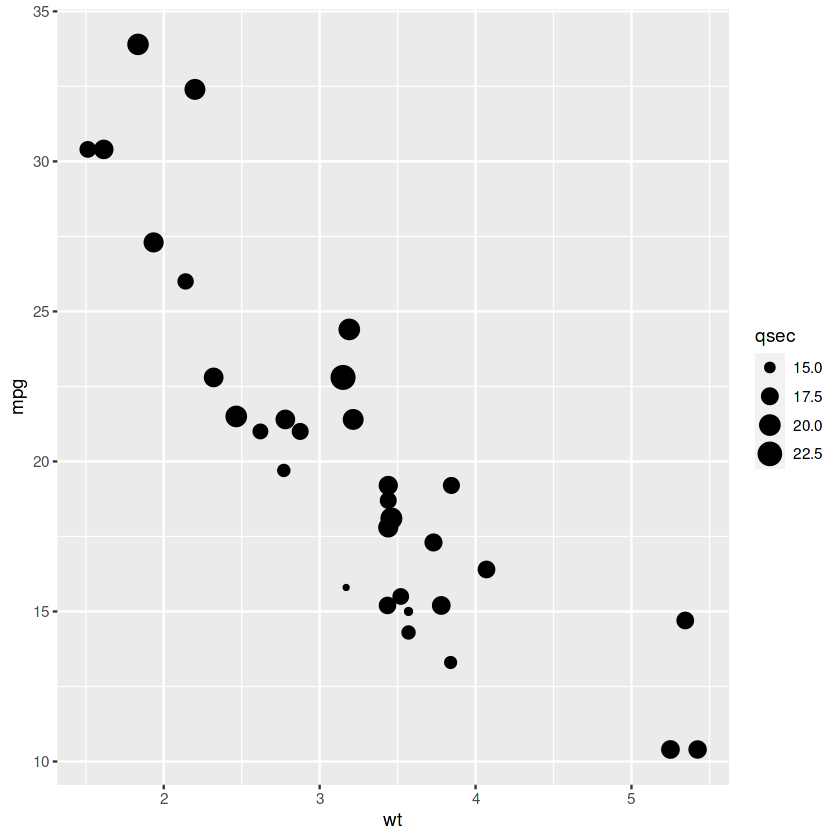

In [20]:
ggplot(mtcars, aes(x=wt, y=mpg)) + 
   geom_point(aes(size=qsec))

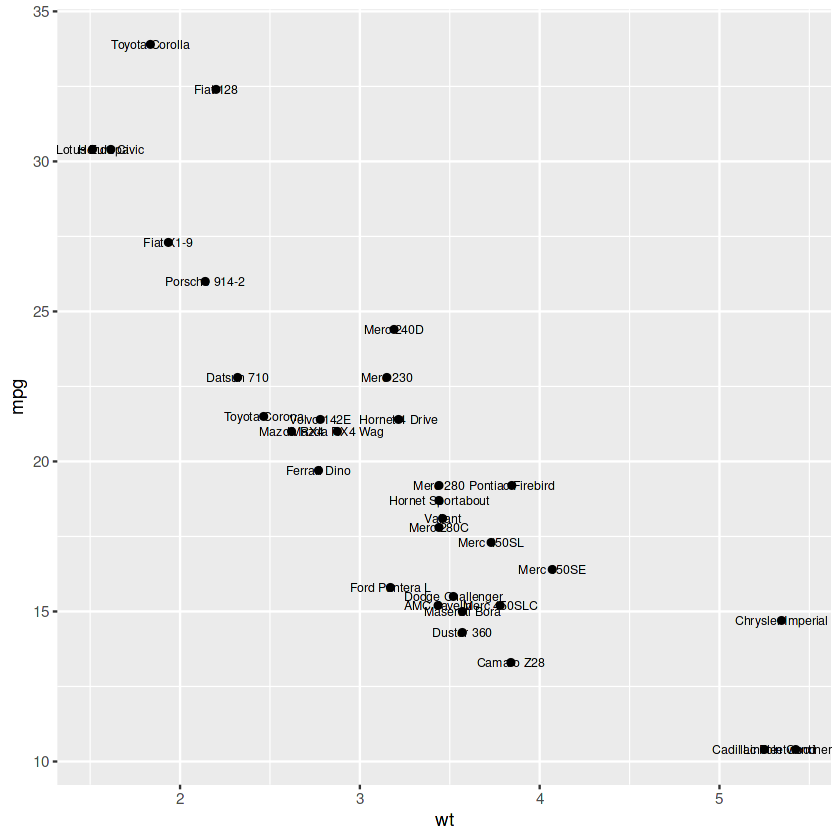

In [21]:
ggplot(mtcars, aes(x=wt, y=mpg)) + 
  geom_point() +  
  geom_text(label=rownames(mtcars), size=2.5)

# Time serie (series temporales)
Las series temporales tienen por objeto estudiar la evolución de una o varias variables a lo largo del tiempo. Se hace un enfoque en “tidyverse”: 
* El paquete de **“lubridate”** es su mejor amigo para tratar con el formato de fecha, y
* El paquete **“ggplot2”** permite trazarlo eficientemente.
* El paquete de “dygraphs” también se considera para construir gráficos interactivos impresionantes.

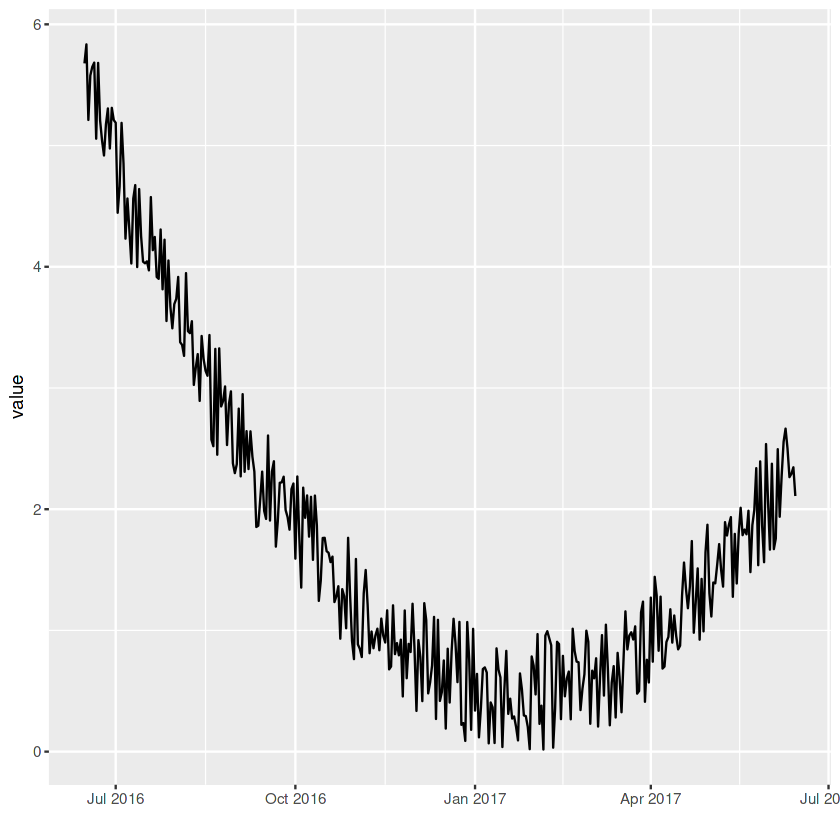

In [22]:
# Dummy data
data <- data.frame(
  day = as.Date("2017-06-14") - 0:364,
  value = runif(365) + seq(-140, 224)^2 / 10000
)
# Most basic bubble plot
p <- ggplot(data, aes(x=day, y=value)) +
  geom_line() + 
  xlab("")
p

Warning message:
“Removed 323 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 323 rows containing missing values (`geom_point()`).”


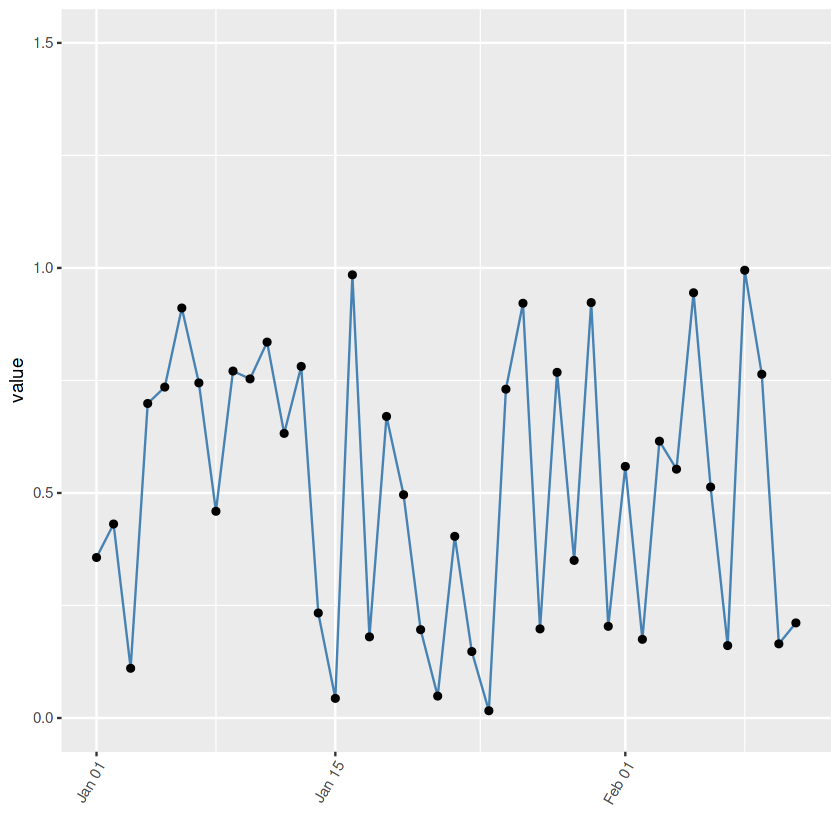

In [23]:
# Dummy data
data <- data.frame(
  day = as.Date("2017-06-14") - 0:364,
  value = runif(365) + seq(-140, 224)^2 / 10000
)
# Most basic bubble plot
z <- ggplot(data, aes(x=day, y=value)) +
  geom_line( color="steelblue") + 
  geom_point() +
  xlab("") +
  theme(axis.text.x=element_text(angle=60, hjust=1)) +
  scale_x_date(limit=c(as.Date("2017-01-01"),as.Date("2017-02-11"))) +
  ylim(0,1.5)
z

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in open.connection(con, "rb"):
“cannot open file '/root/.plotly/.credentials': No such file or directory”
Warning message in open.connection(con, "rb"):
“cannot open file '/root/.plotly/.config': No such file or directory”
Warning message:
“You need a plotly username. See help(signup, package = 'plotly')”
Warning message:
“Couldn't find username”
Warning message in open.connection(con, "rb"):
“cannot open file '/root/.plotly/.credentials': No such file or directory”
Warning message in open.connection(con, "rb"):
“cannot open file '/root/.plotly/.config': No such file or directory”
Warning message:
“You need an api_key. See help(signup, package = 'plotly')”
Warning message:
“Couldn't find api_key”
Warning message:
“'plotly' is deprecated.
Use 'ggplotly' instead.
See help("Deprecated")”
Warning message:
“'plotly' is deprecated.
Use 'plot_ly' instead.
See 

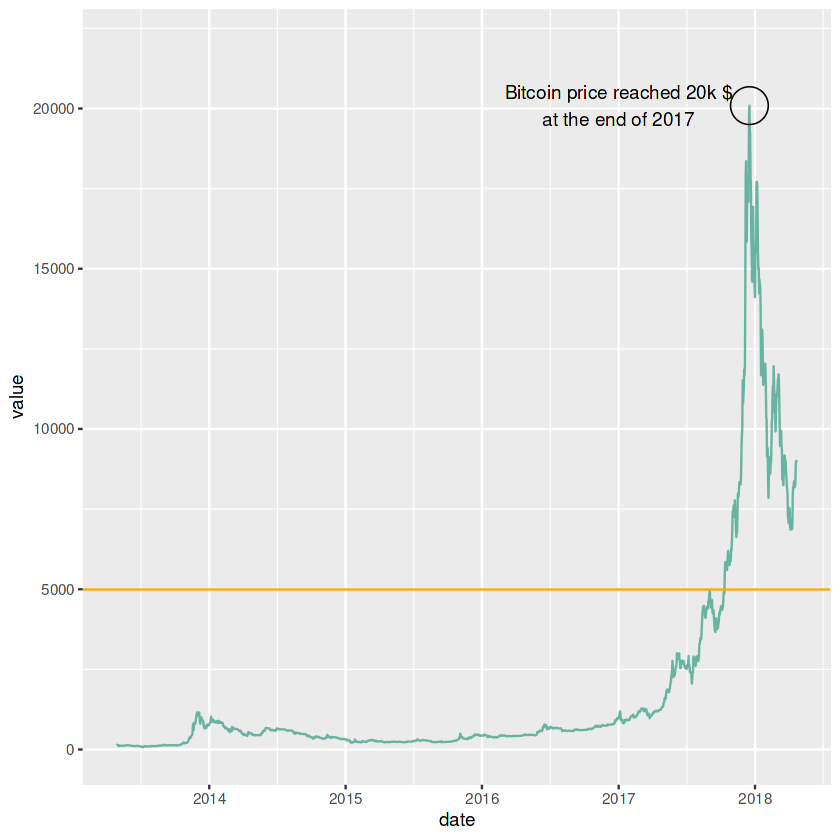

In [24]:
# Cargamos un dataset de github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)
# plot
g7 <- data %>% 
  ggplot( aes(x=date, y=value)) +
    geom_line(color="#69b3a2") +
    ylim(0,22000) +
    annotate(geom="text", x=as.Date("2017-01-01"), y=20089, 
             label="Bitcoin price reached 20k $\nat the end of 2017") +
    annotate(geom="point", x=as.Date("2017-12-17"), y=20089, size=10, shape=21, fill="transparent") +
    geom_hline(yintercept=5000, color="orange", size=.5)

g7 + plotly()

# Unir gráficos
Hay muchas librerias para crear una grilla (grid) que permite gestionar la visualización de los gráficos de multiples maneras.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




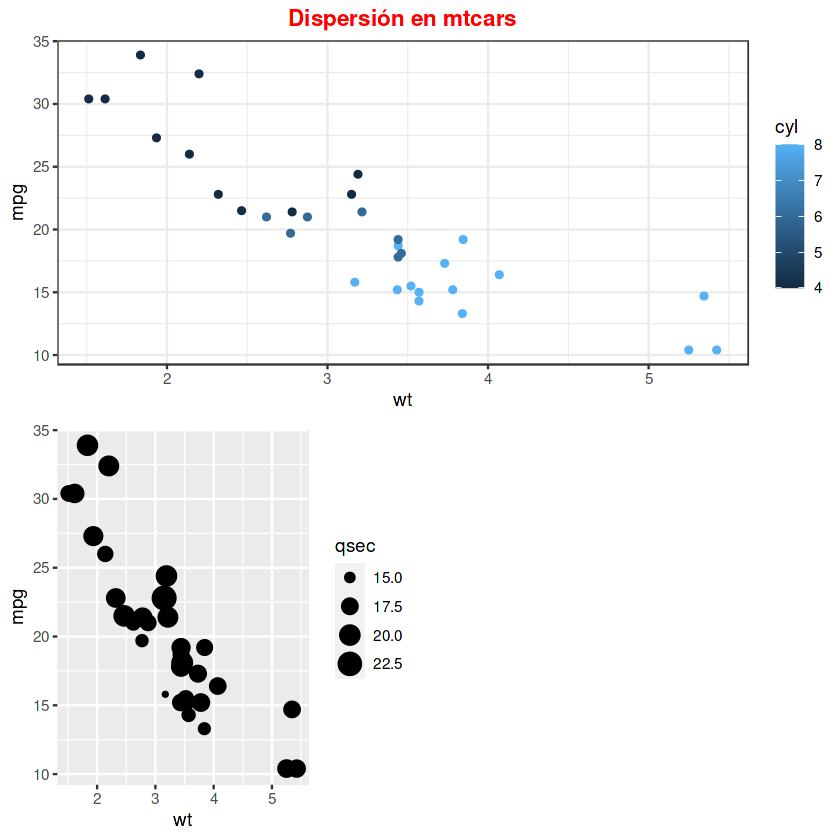

In [25]:
library(gridExtra)

# grafico 1
graf1 <- ggplot(mtcars, aes(x=wt, y=mpg, colour=cyl)) +
    geom_point() +
    theme_bw() +
    ggtitle("Dispersión en mtcars") +
    theme(plot.title = element_text(hjust=0.5,face="bold", color = "red"))

# grafico 2
graf2 <- ggplot(mtcars, aes(x=wt, y=mpg)) + 
   geom_point(aes(size=qsec))

# unir los graficos 1 y 2

grafico <- grid.arrange(graf1, graf2,
                        ncol=2, nrow=2,
                        layout_matrix = rbind(c(1,1), c(2,3))
                        )